# <center> Gun-Violence in US- A Statistical Overview </center>

In [1]:
import pandas as pd
import numpy as np
import datetime
from wordcloud import WordCloud
import seaborn as sb
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen 
from urllib.error import HTTPError
from urllib.error import URLError
from bs4 import BeautifulSoup

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import seaborn as sb
%matplotlib inline

In [4]:
df=pd.read_csv("stage3.csv",parse_dates=['date'],infer_datetime_format=True)

In [5]:
df['incident_characteristics']=df['incident_characteristics'].str.replace('|'," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace('/'," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace('('," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace(')'," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace('-'," ")
df['incident_characteristics']=df['incident_characteristics'].astype(str)

In [6]:
text=[]
for i in range(len(df)):
    text.append(df['incident_characteristics'][i])

In [7]:
with open("file.txt", "w") as output:
    output.write(str(text))

In [8]:
t=open('file.txt').read()

In [9]:
wordcloud = WordCloud().generate(t)

(-0.5, 399.5, 199.5, -0.5)

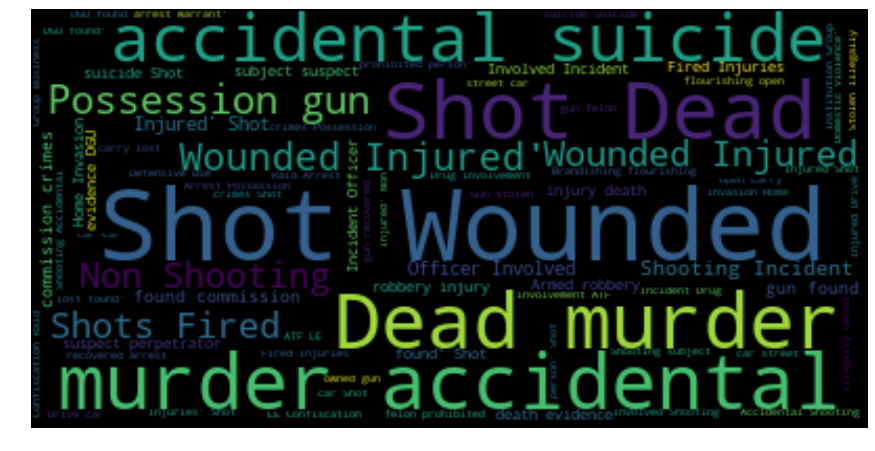

In [10]:
sb.set(rc={'figure.figsize':(15,10)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

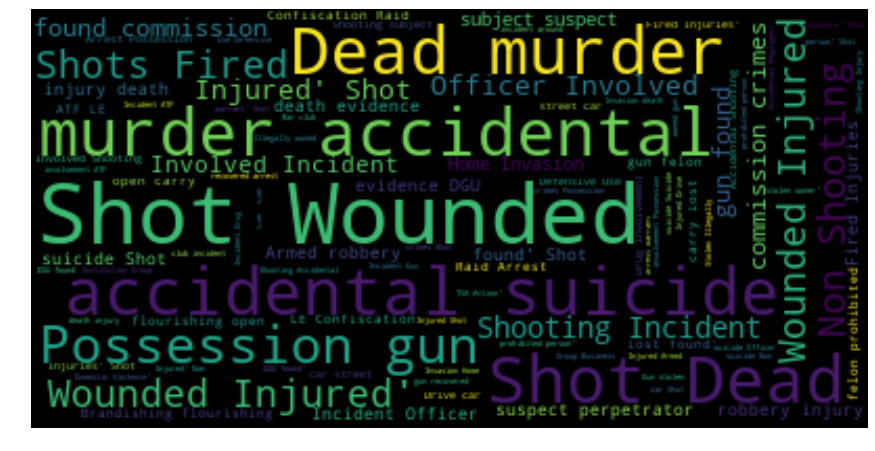

In [11]:
wordcloud = WordCloud(max_font_size=40).generate(t)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
def word_process(text):
    tok=word_tokenize(text)
    return [word for word in tok if not word in stopwords.words('english')]

In [14]:
df['Tokens']=df['incident_characteristics'].apply(word_process)

In [16]:
state=df.groupby(['state'])['n_killed','n_injured'].agg('count').reset_index()
state=state.sort_values('n_killed',ascending=False)

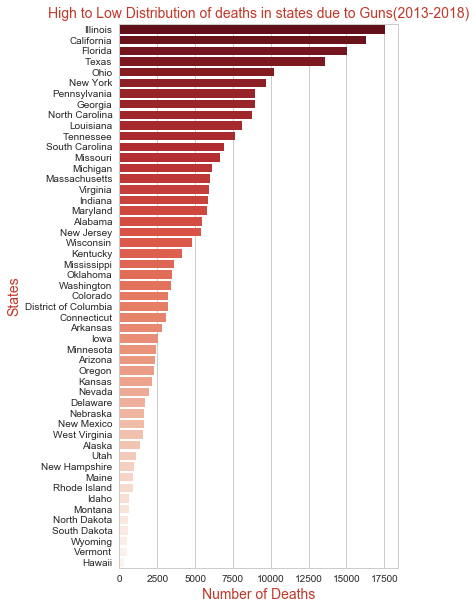

The state with the maximum number of deaths is Illinois with around 17556
On an average every state has almost 4699 deaths


In [17]:
sb.set(rc={'figure.figsize':(5,10)})
sb.set_style("whitegrid")
sb.barplot(x=state['n_killed'],y=state['state'],palette="Reds_r")
plt.xlabel("Number of Deaths",fontsize=14,color='#C0392B')
plt.ylabel("States",fontsize=14,color='#C0392B')
plt.title("High to Low Distribution of deaths in states due to Guns(2013-2018)",fontsize=14,color='#C0392B')
plt.show()
print("The state with the maximum number of deaths is Illinois with around",state['n_killed'].max())
print("On an average every state has almost",int(state['n_killed'].mean()),"deaths")

In [37]:
df['incident_characteristics']=df['incident_characteristics'].str.lower()

In [72]:
df['mass-shooting']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('mass shooting')))
df['suicide']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('suicide')))
df['drug']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('drug')))
df['domestic violence']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('domestic violence')))
df['felon']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('felon')))

In [89]:
df['incident_characteristics'][239647]

'shots fired   no injuries  domestic violence'

In [94]:
df=df.drop(['incident_id','incident_url','source_url','incident_url_fields_missing','sources',
 'state_house_district',
 'state_senate_district'],axis=1)

In [96]:
#Incidents because of mass-shooting
mass=df[['date','state','city_or_county','n_killed','n_injured','mass-shooting']]

Text(0.5,1,'Mass Shootings in every state')

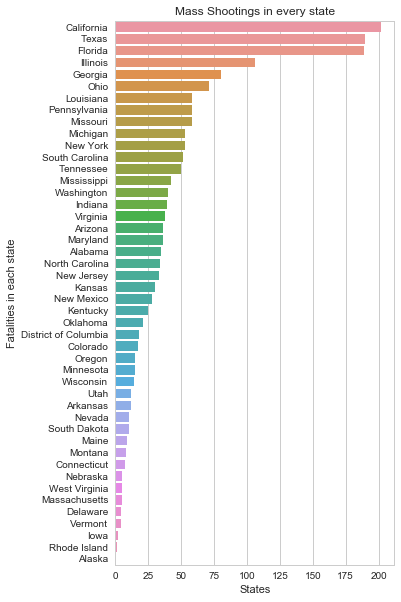

In [169]:
mass=mass[mass['mass-shooting']==True]
x=mass.groupby(['state'])[['n_killed']].sum().reset_index()
x2=mass.groupby(['state','city_or_county'])[['n_killed']].sum().reset_index()
x_mass=x.sort_values(['n_killed'],ascending=False)
x2_mass=x2.sort_values(['n_killed'],ascending=False)
sb.set(rc={'figure.figsize':((5,10))})
sb.set_style("whitegrid")
sb.barplot(x_mass['n_killed'],x_mass['state'])
plt.xlabel("States")
plt.ylabel("Fatalities in each state")
plt.title("Mass Shootings in every state")

In [150]:
mass_shooting_deaths=sum(x2['n_killed'])
deaths=sum(df['n_killed'])
print("Total number of deaths caused by mass-shooting incidents =",sum(x['n_killed']))
print("Total number of deaths caused by gun related incidents =",sum(df['n_killed']))
print("Percentage of deaths caused by mass-shootings",(mass_shooting_deaths/deaths)*100,"%")

Total number of deaths caused by mass-shooting incidents = 1829
Total number of deaths caused by gun related incidents = 60468
Percentage of deaths caused by mass-shootings 3.02474035854 %


In [152]:
states=pd.read_csv("states.csv")

In [163]:
new_df1=pd.merge(x,states, how='left',left_on=['state'],right_on=['State']).dropna()
new_df1=new_df1.drop(['Rank','State'],axis=1)
new_df1=new_df1.sort_values(['n_killed'],ascending=False)

In [164]:
new_df1['PerDeaths']=(new_df1['n_killed']/new_df1['Population'])*100

In [182]:
#States with the most number of mass-shootings/killing incidents
new_df2=mass.groupby(['state'])["n_killed"].count().reset_index().sort_values(['n_killed'],ascending=False)

In [183]:
new_df2['percentincidents']=(new_df2['n_killed']/len(mass))*100

In [184]:
new_df2

,state,n_killed,percentincidents
4,California,194,11.850947
11,Illinois,151,9.224191
9,Florida,116,7.086133
39,Texas,97,5.925473
29,New York,78,4.764814
10,Georgia,69,4.215027
34,Pennsylvania,65,3.970678
16,Louisiana,63,3.848503
38,Tennessee,62,3.787416
31,Ohio,62,3.787416


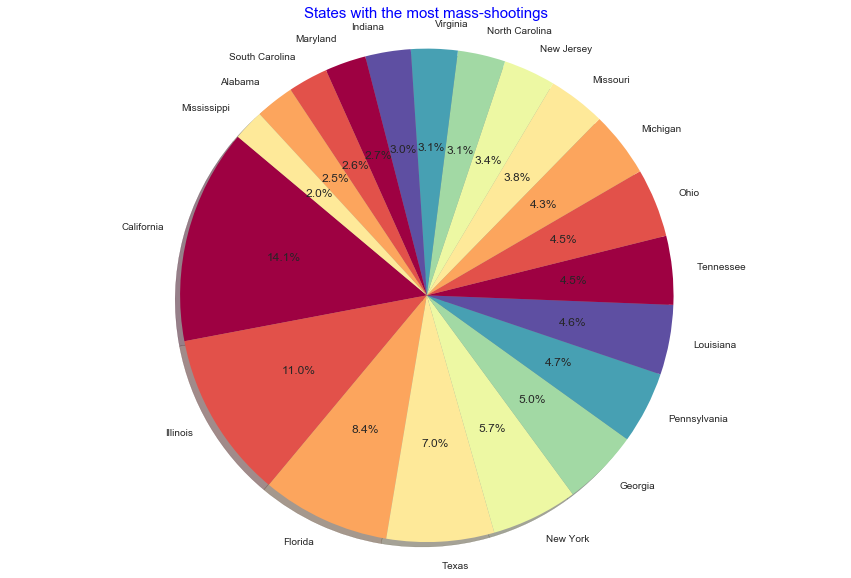

In [196]:
sb.set(rc={'figure.figsize':((15,10))})
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.pie(new_df2['n_killed'][0:20], labels=new_df2['state'][0:20],
        autopct='%1.1f%%', shadow=True, startangle=140,colors=colors)
plt.axis('equal')
plt.title("States with the most mass-shootings",fontsize=15,color="Blue")
plt.show()

In [200]:
#A deeper look at these incidents-people who mostly get affected, the reason behind it and if there is
#a way to overcome it

subset1=df[df['mass-shooting']==True]

In [527]:
null_values1 =pd.DataFrame(df.isnull().sum()).reset_index()
null_values1.rename(columns={'index': 'RowNames', 0: 'Blank RowCount'},inplace=True)
null_values1['Precent Blank Values']=(null_values1['Blank RowCount']/len(df))*100
null_values1=null_values1.sort_values(['Precent Blank Values'],ascending=False)
null_values1.head()

,RowNames,Blank RowCount,Precent Blank Values
27,participant5-age,237733,99.188908
32,participant5_gender,235096,98.088678
26,participant4-age,234540,97.856699
31,participant4_gender,227548,94.939439
25,participant3-age,225396,94.041564


In [419]:
df=df.drop(['participant_relationship','location_description','participant_name'],axis=1)

Cleaning the dataset

In [208]:
#Filling the blanks to get to better results, for the number of guns involved use the median

In [283]:
df['n_guns_involved'][df['n_guns_involved'].isnull()]=df['n_guns_involved'].median()

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [284]:
df['participant_age']=df['participant_age'].str.replace("|"," ")

In [483]:
df['participant1-age']=df['participant_age'].str[3:5]
df['participant2-age']=df['participant_age'].str[10:12]
df['participant3-age']=df['participant_age'].str[17:19]
df['participant4-age']=df['participant_age'].str[24:26]
df['participant5-age']=df['participant_age'].str[31:33]

In [484]:
df['participant1-age']=df['participant1-age'].str.replace(":","")
df['participant1-age']=df['participant1-age'].str.replace("'","")
#df['participant1-age']=df['participant1-age'].str.replace(" ","NaN")

In [363]:
df['participant1-age'][df['participant1-age']==""]=18

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [456]:
df['participant_type'][200][-19:]

'19::Subject-Suspect'

In [466]:
df=df.drop(['address','congressional_district'],axis=1)

In [469]:
df=df.drop(['latitude','longitude'],axis=1)

In [476]:
np.nan

nan

In [491]:
df['participant1-age'][df['participant1-age']==""]=np.nan
df['participant2-age'][df['participant2-age']==""]=np.nan
df['participant3-age'][df['participant3-age']==""]=np.nan
df['participant4-age'][df['participant4-age']==""]=np.nan
df['participant5-age'][df['participant5-age']==""]=np.nan

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Isha\Anaconda

In [486]:
median_age=df['participant1-age'][df['participant1-age'].isnull()==False].astype(int).median()

In [487]:
df['participant1-age'][df['participant1-age'].isnull()==True]=median_age

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Trying to find the total number of participants involved in a crime

In [494]:
df=df.drop(['total-participants'],axis=1)

In [543]:
df['participant1_gender']=df['participant_gender'].str.split("|",expand=True)[0].str[3:4]
df['participant2_gender']=df['participant_gender'].str.split("|",expand=True)[2].str[3:4]
df['participant3_gender']=df['participant_gender'].str.split("|",expand=True)[4].str[3:4]
df['participant4_gender']=df['participant_gender'].str.split("|",expand=True)[6].str[3:4]
df['participant5_gender']=df['participant_gender'].str.split("|",expand=True)[8].str[3:4]

In [562]:
df['participant1_type']=df['participant_type'].str.split("|",expand=True)[0].str[-7:]
df['participant2_type']=df['participant_type'].str.split("|",expand=True)[2].str[-7:]
df['participant3_type']=df['participant_type'].str.split("|",expand=True)[4].str[-7:]
df['participant4_type']=df['participant_type'].str.split("|",expand=True)[6].str[-7:]
df['participant5_type']=df['participant_type'].str.split("|",expand=True)[8].str[-7:]

In [568]:
df['participant1_type']=df['participant1_type'].str.replace(":","")
df['participant2_type']=df['participant2_type'].str.replace(":","")
df['participant3_type']=df['participant3_type'].str.replace(":","")
df['participant4_type']=df['participant4_type'].str.replace(":","")
df['participant5_type']=df['participant5_type'].str.replace(":","")

In [572]:
import plotly
plotly.__version__


'2.2.2'

In [573]:
import plotly.plotly as py
import plotly.graph_objs as go

In [591]:
x3=df.groupby(['state'])[['n_killed','n_injured']].agg(sum).reset_index()
x3=x3.sort_values(['n_killed','n_injured'],ascending=False)
x3.head()

,state,n_killed,n_injured
4,California,5562,7644
43,Texas,5046,6106
9,Florida,3909,7072
13,Illinois,3409,13514
35,Ohio,2508,5703


In [645]:
trace0 = go.Scatter(
    x = x3['state'],
    y = x3['n_killed'],
    mode = 'lines+markers',
    name = 'People-killed'
    ,
    fill='tozerox'
)
trace1 = go.Scatter(
    x = x3['state'],
    y = x3['n_injured'],
    mode = 'lines+markers',
    name = 'People-injured'

)
trace2 = go.Scatter(
    x = x3['state'],
    y = x3['n_killed']+x3['n_injured'],
    mode = 'lines+markers',
    name = 'People-affected'
)

layout = go.Layout(    title='plot-title',
    xaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='States',
        range=[1,50],
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=True
    ),
    yaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='People affected by Gun-Violence',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='inside',
        zeroline=True
    ),
)

data=[trace0,trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename= 'shaded_lines')

In [602]:
x4=df.groupby(['city_or_county'])[['n_killed','n_injured']].agg('sum').reset_index().sort_values(['n_killed','n_injured'],ascending=False)
x4.head()

,city_or_county,n_killed,n_injured
2019,Chicago,2104,10427
5303,Houston,1145,1255
530,Baltimore,1055,2427
10152,Saint Louis,919,1783
9018,Philadelphia,901,2326


In [646]:
trace0 = go.Scatter(
    x = x4['city_or_county'],
    y = x4['n_killed'],
    mode = 'lines+markers',
    name = 'People-killed'
    ,
    fill='tozerox'
)
trace1 = go.Scatter(
    x = x4['city_or_county'],
    y = x4['n_injured'],
    mode = 'lines+markers',
    name = 'People-injured'

)
trace2 = go.Scatter(
    x = x4['city_or_county'],
    y = x4['n_killed']+x4['n_injured'],
    mode = 'lines+markers',
    name = 'People-affected'
)

layout = go.Layout(    title='plot-title',
    xaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='City',
        range=[1,50],
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=True
    ),
    yaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='People affected by Gun-Violence',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='inside',
        zeroline=True
    ),
)

data=[trace0,trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename= 'shaded_lines')

The draw time for this plot will be slow for clients without much RAM.


C:\Users\Isha\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [624]:
totalguns=df['n_guns_involved'].sum()
x5=df.groupby(['state'])['n_guns_involved'].agg(sum).reset_index()
x5['PercentofGuns']=(x5['n_guns_involved']/totalguns)*100
x5=x5.sort_values(['PercentofGuns'],ascending=False)
x5.head()

,state,n_guns_involved,PercentofGuns
4,California,23695.0,8.117423
13,Illinois,19621.0,6.721753
9,Florida,19214.0,6.582324
43,Texas,15782.0,5.406591
35,Ohio,12553.0,4.300401


In [628]:
trace = go.Pie(labels=x5['state'], values=x5['PercentofGuns'],
               hoverinfo='label', textinfo='value', 
               textfont=dict(size=20),
               marker=dict( 
                           line=dict(color='#000000', width=2)))
py.iplot([trace], filename='styled_pie_chart',)

Text(0.5,1,'Percentage Distribution of Guns')

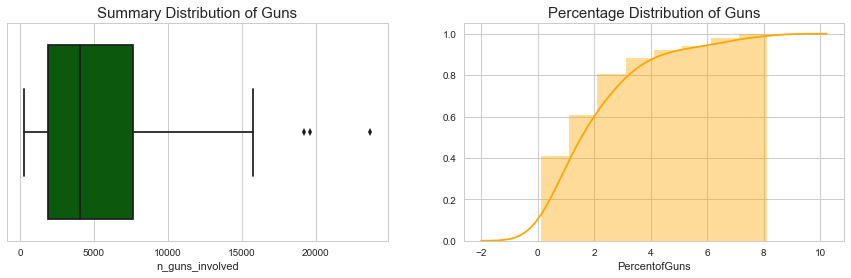

In [651]:
sb.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,4))
sb.boxplot(x5['n_guns_involved'],color='DarkGreen',ax=ax1)
ax1.set_title("Summary Distribution of Guns",fontsize=15)
plt.xlabel("Number of Guns involved")
sb.distplot(x5.PercentofGuns,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True),color='Orange',ax=ax2)
ax2.set_title("Percentage Distribution of Guns",fontsize=15)

In [672]:
import decimal

In [661]:
women=len(df[(df['participant1_gender']=='F') & (df['participant1_type']=='Suspect')])+len(df[(df['participant2_gender']=='F') & (df['participant2_type']=='Suspect')])+len(df[(df['participant3_gender']=='F') & (df['participant3_type']=='Suspect')])+len(df[(df['participant4_gender']=='F') & (df['participant4_type']=='Suspect')])+len(df[(df['participant5_gender']=='F') & (df['participant5_type']=='Suspect')])
men=len(df[(df['participant1_gender']=='M') & (df['participant1_type']=='Suspect')])+len(df[(df['participant2_gender']=='M') & (df['participant2_type']=='Suspect')])+len(df[(df['participant3_gender']=='M') & (df['participant3_type']=='Suspect')])+len(df[(df['participant4_gender']=='M') & (df['participant4_type']=='Suspect')])+len(df[(df['participant5_gender']=='M') & (df['participant5_type']=='Suspect')])

In [673]:
x6={'Gender':['men','women'],
    'Suspects':[men,women],
     'Percent-Suspects':[round((men/total)*100,2),round((women/total)*100,2)]}

In [674]:
x6

{'Gender': ['men', 'women'],
 'Percent-Suspects': [93.34, 6.66],
 'Suspects': [156804, 11192]}

Total incidents where the police had a suspect 167996
Total incidents where the police had a female suspect 11192
Total incidents where the police had a male suspect 156804


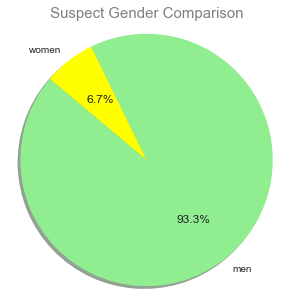

In [680]:
total=women+men
print("Total incidents where the police had a suspect",total)
print("Total incidents where the police had a female suspect",women)
print("Total incidents where the police had a male suspect",men)
x6={'Gender':['men','women'],
    'Suspects':[men,women],
     'Percent-Suspects':[round((men/total)*100,2),round((women/total)*100,2)]}
x6=pd.DataFrame(x6)
sb.set(rc={'figure.figsize':((5,5))})
colors = ['LightGreen','Yellow']
plt.pie(x6['Percent-Suspects'], labels=x6['Gender'],
        autopct='%1.1f%%', shadow=True, startangle=140,colors=colors)
plt.axis('equal')
plt.title("Suspect Gender Comparison",fontsize=15,color="Gray")
plt.show()

# Domestic Violence Abuse cases - Deepdive

In [707]:
abuse_female=len(df[((df['participant1_gender']=='F')&(df['participant1_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant2_gender']=='F')&(df['participant2_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant3_gender']=='F')&(df['participant3_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant4_gender']=='F')&(df['participant4_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant5_gender']=='F')&(df['participant5_type']=='Suspect')&(df['domestic violence']==True))])
totaldomestic=len(df['domestic violence']==True)
abuse_male=len(df[((df['participant1_gender']=='M')&(df['participant1_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant2_gender']=='M')&(df['participant2_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant3_gender']=='M')&(df['participant3_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant4_gender']=='M')&(df['participant4_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant5_gender']=='M')&(df['participant5_type']=='Suspect')&(df['domestic violence']==True))])
victim_female=len(df[((df['participant1_gender']=='F')&(df['participant1_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant2_gender']=='F')&(df['participant2_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant3_gender']=='F')&(df['participant3_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant4_gender']=='F')&(df['participant4_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant5_gender']=='F')&(df['participant5_type']=='Victim')&(df['domestic violence']==True))])
victim_male=len(df[((df['participant1_gender']=='M')&(df['participant1_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant2_gender']=='M')&(df['participant2_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant3_gender']=='M')&(df['participant3_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant4_gender']=='M')&(df['participant4_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant5_gender']=='M')&(df['participant5_type']=='Victim')&(df['domestic violence']==True))])

In [711]:
x7={'Gender':['Male','Female'],
     'DomesticAbuse-Suspects':[abuse_male,abuse_female],
     'PercentDomesticAbuse-Suspects':[round((abuse_male/(abuse_male+abuse_female))*100,2),round((abuse_female/(abuse_male+abuse_female))*100,2)],
      'TotalSuspects':[men,women],
       'DomesticAbuse-Victims':[victim_male,victim_female],
       'PercentDomesticAbuse-Victims':[round((victim_male/(victim_male+victim_female))*100,2),round((victim_female/(victim_male+victim_female))*100,2)]
   }
x7=pd.DataFrame(x7)
x7.head()

,DomesticAbuse-Suspects,DomesticAbuse-Victims,Gender,PercentDomesticAbuse-Suspects,PercentDomesticAbuse-Victims,TotalSuspects
0,8651,4473,Male,86.06,44.88,156804
1,1401,5493,Female,13.94,55.12,11192


Text(0.5,1,'Domestic Abuse Victims comparison between Men and Women')

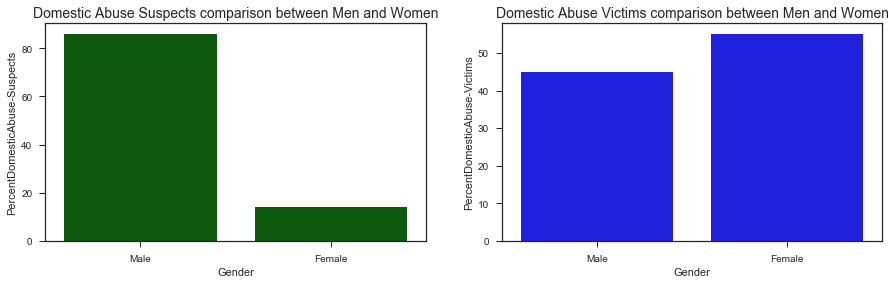

In [728]:
sb.set_style("ticks")
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,4))
sb.barplot(x7['Gender'],x7['PercentDomesticAbuse-Suspects'],color='DarkGreen',ax=ax1)
ax1.set_title("Domestic Abuse Suspects comparison between Men and Women",fontsize=14)
sb.barplot(x7['Gender'],
           x7['PercentDomesticAbuse-Victims'],color='Blue',ax=ax2)
ax2.set_title("Domestic Abuse Victims comparison between Men and Women",fontsize=14)

In [722]:
dom=df[df['domestic violence']==True]

In [726]:
state_dom=dom.groupby(['state'])[['n_killed','n_injured']].agg(sum).reset_index()
state_dom=state_dom.sort_values(['n_killed','n_injured'],ascending=False)
state_dom.head()

,state,n_killed,n_injured
43,Texas,731,330
9,Florida,501,322
4,California,374,182
35,Ohio,369,253
10,Georgia,354,186


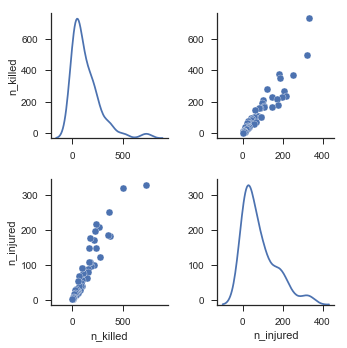

In [776]:
sb.pairplot(state_dom, palette="Set2", diag_kind="kde")

Text(0.5,1,'Top 20 states with the most fatalities because of domestic violence')

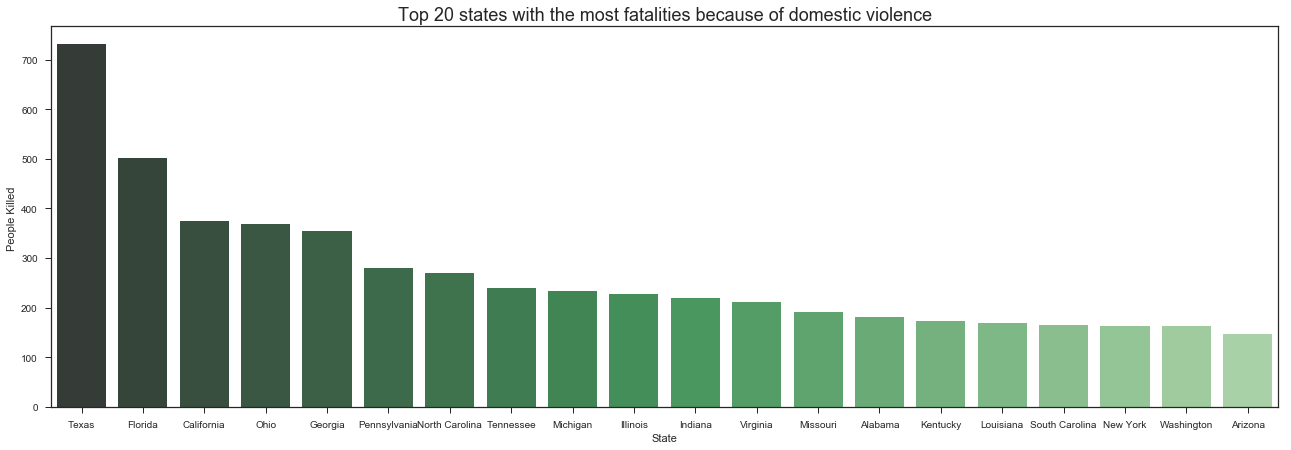

In [780]:
sb.set(rc={'figure.figsize':((22,7))})
sb.set_style("ticks")
sb.barplot(state_dom['state'][0:20],state_dom['n_killed'][0:20],palette="Greens_d")
plt.xlabel("State")
plt.ylabel("People Killed")
plt.title("Top 20 states with the most fatalities because of domestic violence",fontsize=18)

Text(0.5,1,'Top 20 states with the most injuries because of domestic violence')

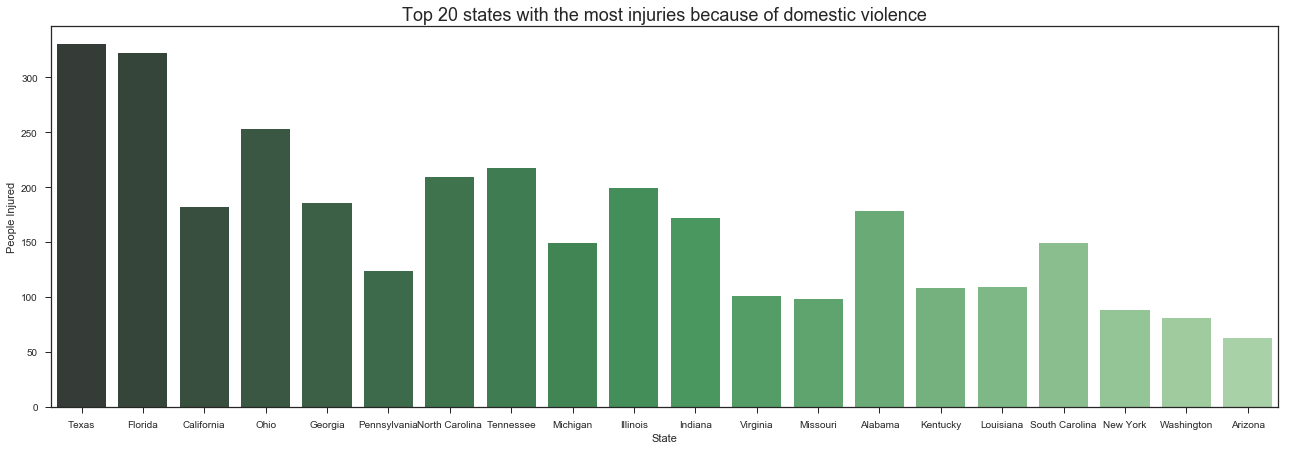

In [781]:
sb.set(rc={'figure.figsize':((22,7))})
sb.set_style("ticks")
sb.barplot(state_dom['state'][0:20],state_dom['n_injured'][0:20],palette="Greens_d")
plt.xlabel("State")
plt.ylabel("People Injured")
plt.title("Top 20 states with the most injuries because of domestic violence",fontsize=18)

In [790]:
dom['weapon']=dom['gun_type'].str.split("|",expand=True)[0].str[3:]

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [794]:
dom['weapon'][dom['weapon']=='Unknown']=np.nan

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Isha\Anaconda3\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Isha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [798]:
x8=dom[dom['weapon'].isnull()==False]

In [802]:
x8=x8.groupby(['weapon'])['n_killed','n_injured'].agg(sum).reset_index().sort_values(['n_killed'],ascending=False)

In [805]:
x8.head()

,weapon,n_killed,n_injured
22,Handgun,588,368
21,9mm,138,91
25,Shotgun,136,92
24,Rifle,123,68
3,22 LR,90,66


In [804]:
trace0 = go.Scatter(
    x = x8['weapon'],
    y = x8['n_killed'],
    mode = 'lines+markers',
    name = 'People-killed'
    ,
    fill='tozerox'
)
trace1 = go.Scatter(
    x = x8['weapon'],
    y = x8['n_injured'],
    mode = 'lines+markers',
    name = 'People-injured'

)
trace2 = go.Scatter(
    x = x8['weapon'],
    y = x8['n_killed']+x8['n_injured'],
    mode = 'lines+markers',
    name = 'People-affected'
)

layout = go.Layout( title='Deaths and injuries caused by different type of guns',
    xaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='City',
        range=[1,50],
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=True
    ),
    yaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='People affected by Gun-Violence',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='inside',
        zeroline=True
    ),
)

data=[trace0,trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename= 'shaded_lines')

In [820]:
data=[]
indices=dom['notes'][dom['notes'].isnull()==False].index
for i in indices:
    data.append(dom['notes'][dom['notes'].isnull()==False][i])

(-0.5, 399.5, 199.5, -0.5)

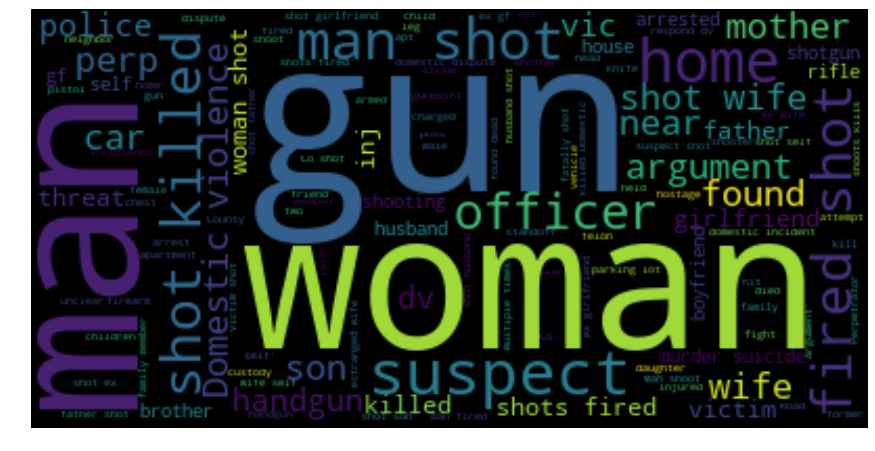

In [824]:
wordcloud = WordCloud().generate(str(data))
sb.set(rc={'figure.figsize':(15,10)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")